# Assignment 4 - Self Evaluation

Complete the following for each dataset.

Create a Logistic Regression model:
1. Choose which variables to include in your model and be sure to provide some explanation regarding that choice. In other words, tell me why you are choosing certain variables to be included in your model.
>Based on the decision points and the reasons mentioned by the professor. I believe that my decision variables were thought through in the same lines and have been reasoned out the same way. 
>The idea of using methods and reusing the code is something that I would like to adapt as that would reduce the complexity of the code while making is easy to comprehend.

2. Choose a classification threshold and explain your choice.
>I think reviewing the correlation between FPR and FNR is a great idea to get and idea of False Positives and False Negatives which would eventually speak volumes about the missed opportunities.

3. Explanations for a. and b. above should include discussion of some specific performance measures. What performance measures are you using and why?
>Having and idea of the domain knowledge will help to learn more on which performance measure whould have been more useful. The performance measures used in my code are based on a general analysis on the dataset. 

Create a kNN Classification model:
1. Choose k, the number of neighbors to use in your classification. Why did you select that value?
> Based on all our notebooks(Professor's, Sai's and mine) I feel we have used the performance measures to figure out a k value hence I feel I made the righ choices.

2. You may choose to adjust your classification rule. Remember, by default, the rule is “majority rule.”  If we want a probability threshold that is different than 50%, you will have to use the “predict_proba()” function to compute class prediction probabilities and then feed those probabilities into the “binarize()” function to get class assignments based on a different probability threshold.
> My notebook is an exact representation of the what was required out of me on this. A density plot helps to make it better and enhance the classification rules.

3. In making your decisions regarding “k” and “majority rule”, be sure to discuss your goals (performance measures of interest).
> I may have been a bit apprehensive to make this decision which might have been visible on some of my models. Having said that I do feel that I could gain more insights from the solution notebooks provided.

Compare and contrast your LR and kNN results. If you had to choose between these methods, which method would you choose for each dataset?
>Based on my learning from the classes I have used performance measures and the final threshold values of kNN and LR to evaluate the methods and make a decision however stating them as per professor's solution is a great idea.

In [167]:
import pandas as pd
import numpy as np


from sklearn import preprocessing as prep
from sklearn.preprocessing import binarize
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, r2_score, mean_squared_error

import plotly.graph_objects as go
import plotly.express as px

import seaborn as sns
import matplotlib.pyplot as plt

# Data Set 1: Systems Admin Data

In [168]:
#Read the data
dfSysAd = pd.read_csv('SystemAdministrators.csv')
#Check a few(reading 10) rows of the table to verify if the data was ingested
dfSysAd.tail(10)

,Experience,Training,Completed task
65,6.5,4,No
66,7.4,8,No
67,6.5,4,No
68,8.2,4,No
69,5.9,4,No
70,5.6,4,No
71,5.9,8,No
72,6.4,6,No
73,3.8,4,No
74,5.3,4,No


In [169]:
#Get a general idea of the data
dfSysAd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Experience      75 non-null     float64
 1   Training        75 non-null     int64  
 2   Completed task  75 non-null     object 
dtypes: float64(1), int64(1), object(1)
memory usage: 1.9+ KB


In [170]:
from sklearn.preprocessing import StandardScaler,LabelBinarizer

# As instructed we now Normalize the data
std_scaler = StandardScaler()
label_binarizer = LabelBinarizer()

variables = dfSysAd.columns[:-1]
label = dfSysAd.columns[-1]

dfSysAd[variables] = std_scaler.fit_transform(dfSysAd[variables])
dfSysAd['Label'] = label_binarizer.fit_transform(dfSysAd[label])

dfSysAd

,Experience,Training,Completed task,Label
0,1.815416,-0.521382,Yes,1
1,1.372631,-0.521382,Yes,1
2,1.594023,1.178778,Yes,1
3,3.055212,1.178778,Yes,1
4,1.151239,2.878938,Yes,1
...,...,...,...,...
70,-0.531341,-0.521382,No,0
71,-0.398506,2.878938,No,0
72,-0.177114,1.178778,No,0
73,-1.328353,-0.521382,No,0


In [171]:
#Above we see that the column Completed task is an object and so we can convert it to binary variable.
dfSysAd = pd.get_dummies(dfSysAd).drop(['Completed task_No'],axis=1) 

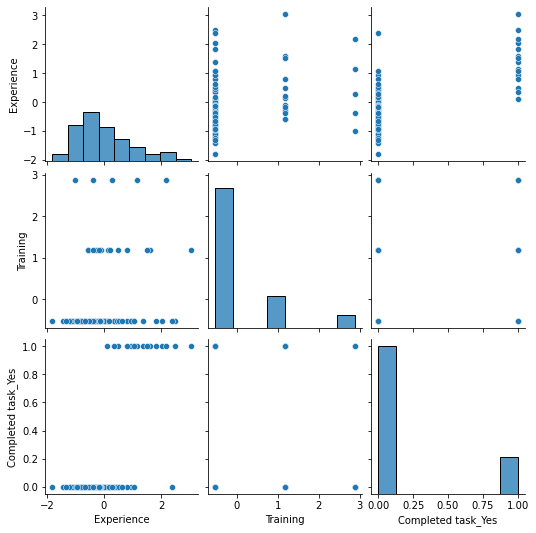

In [172]:
#Let us plot the graphs among these three columns and also find the correlation between them
sns.pairplot(dfSysAd[['Experience','Training','Completed task_Yes']]) 

>**Note:**From the above we see that Completed_task_Yes have extreme values which help us learn that the data might be impabalanced while Training is distributed around 3 X points in the XY graphs, Experience is normally sitributed but is skewed towards right. 
We can also look how they are correlated with each other to get more information.

<AxesSubplot:>

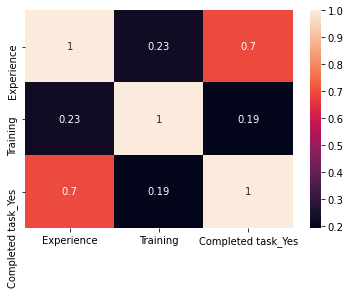

In [173]:
columns = ['Experience','Training','Completed task_Yes']
dfSysAddata = dfSysAd[columns]
SysAdcorr = dfSysAddata.corr()
sns.heatmap(SysAdcorr,annot=True)

1. Choose which variables to include in your model and be sure to provide some explanation regarding that choice. In other words, tell me why you are choosing certain variables to be included in your model.

>**Decision Point:**<br> Based on the above heat map for correlation, we see that the variable "Completed task_Yes" has the strongest correlation with our target variable, "Experience."  Hence, we can build the model using "Completed task_Yes" as the only explanatory variable.

# Create a Logistic Regression model:

In [174]:
# Split Data
predictors = ['Experience']
X = dfSysAd[predictors] 
y = dfSysAd['Completed task_Yes'] 

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=10)

X_train_means = X_train.mean()
X_train_std = X_train.std()

X_train = (X_train - X_train_means)/X_train_std
X_test = (X_test - X_train_means)/X_train_std

# Run LogisticRegression 
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)

LogisticRegression()

In [175]:
# Store predicted probability for Completed task_Yes = 1
y_pred_prob = log_reg.predict_proba(X_test)[:,1]

# make class predictions for the testing set
y_pred_class = log_reg.predict(X_test)

# Create list of values for loop to iterate over
threshold = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]

# Create empty lists to store metric values created within loop
recall = []
FPR = []
FNR = []
F1 = []
Accuracy = []

# Start loop
for i in threshold:
    
    # Create class assignments given threshold value
    y_pred_class = binarize([y_pred_prob],threshold=i)[0]
    
    # Create Metrics
    confusion = metrics.confusion_matrix(y_test, y_pred_class)
    recall_value = metrics.recall_score(y_test, y_pred_class).round(3)
    fpr_value = (confusion[0,1] / (confusion[0,1] + confusion[0,0]) ).round(2)
    fnr_value = (confusion[1,0] / (confusion[1,0] + confusion[1,1]) ).round(2)
    f1_value = metrics.f1_score(y_test, y_pred_class).round(2)
    accuracy_value = metrics.accuracy_score(y_test, y_pred_class).round(2)
    
    
    # Append lists
    recall.append(recall_value)
    FPR.append(fpr_value)
    FNR.append(fnr_value)
    F1.append(f1_value)
    Accuracy.append(accuracy_value)

# Create dataframe
result = pd.DataFrame({"threshold":threshold,
                       "recall":recall,
                       "FPR":FPR,
                       "FNR":FNR,
                       "F1_Score": F1,
                       "Accuracy": Accuracy
                      })

# Show result
result

,threshold,recall,FPR,FNR,F1_Score,Accuracy
0,0.0,1.00,1.00,0.00,0.30,0.17
1,0.1,1.00,0.26,0.00,0.62,0.78
2,0.2,1.00,0.21,0.00,0.67,0.83
3,0.3,0.75,0.11,0.25,0.67,0.87
4,0.4,0.75,0.05,0.25,0.75,0.91
5,0.5,0.75,0.05,0.25,0.75,0.91
6,0.6,0.75,0.05,0.25,0.75,0.91
7,0.7,0.50,0.05,0.50,0.57,0.87
8,0.8,0.25,0.05,0.75,0.33,0.83
9,0.9,0.25,0.05,0.75,0.33,0.83


C:\Users\akash\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).



<AxesSubplot:ylabel='Density'>

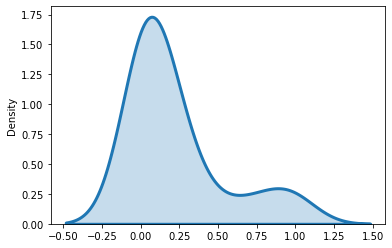

In [176]:
# Density Plot of predicted probabilities
sns.distplot(y_pred_prob, hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3},)

In [177]:
y_pred_class_lr = binarize([y_pred_prob],threshold=0.4)[0]

# Create Metrics
confusion= metrics.confusion_matrix(y_test, y_pred_class_lr)
recall_value = metrics.recall_score(y_test, y_pred_class_lr).round(3)
fpr_value = (confusion_lr[0,1] / (confusion_lr[0,1] + confusion_lr[0,0]) ).round(2)
fnr_value = (confusion_lr[1,0] / (confusion_lr[1,0] + confusion_lr[1,1]) ).round(2)
f1_value= metrics.f1_score(y_test, y_pred_class_lr).round(2)
accuracy_value = metrics.accuracy_score(y_test, y_pred_class_lr).round(2)

report=pd.DataFrame({'Recall':[recall_value],
                     'FPR':[fpr_value],
                     'FNR':[fnr_value],
                     'F1':[f1_value],
                     'Accuracy':[accuracy_value]
                    })
report

,Recall,FPR,FNR,F1,Accuracy
0,0.75,0.05,0.25,0.75,0.91


2. Choose a classification threshold and explain your choice.
>**Answer:**<br>Based on the table, we see that F1_Score at 0.4, 0.5 and 0.6 is highest when compared to others therefore, we can select 0.4 as the threshold. F1 score is a good to evaluate our model since we know that we have imbalanced data.
    
3. Explanations for a. and b. above should include discussion of some specific performance measures. What performance measures are you using and why?

>**Answer:**<br>F1-Score is a good performance measure since it is a result of Recall and Precision which will help us determine if our model can identify the positive cases and negative cases correctly. Thus we use F1-Score over others. Also, if we use Recall or FNR it will be difficult to determine if our model was able to identify the negative cases correctly. The same with FPR as we will be unsure if the positive cases identified are correct or not. If we would consider Accuracy we would want to have more cases in negative.

# Create a kNN Classification model:

In [178]:
# kNN
# Train a classifier for different values of k
results = []
for k in range(1,21):
    knn = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
    y_pred_class = knn.predict(X_test)
    confusion = metrics.confusion_matrix(y_test,y_pred_class)
    results.append({'k':k,
                    'accuracy':metrics.accuracy_score(y_test,knn.predict(X_test)),
                    'fnr':(confusion[1,0] / (confusion[1,0] + confusion[1,1])).round(3),
                    'f1_value':metrics.f1_score(y_test, y_pred_class).round(3),
                    'recall_value': metrics.recall_score(y_test, y_pred_class).round(3),
                    'precision_score': metrics.precision_score(y_test, y_pred_class).round(3)
                   })

# Convert results to Pandas dataframe
results = pd.DataFrame(results)
results



C:\Users\akash\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



,k,accuracy,fnr,f1_value,recall_value,precision_score
0,1,0.826087,0.50,0.500,0.50,0.500
1,2,0.869565,0.50,0.571,0.50,0.667
2,3,0.913043,0.25,0.750,0.75,0.750
3,4,0.913043,0.25,0.750,0.75,0.750
4,5,0.913043,0.25,0.750,0.75,0.750
5,6,0.913043,0.25,0.750,0.75,0.750
6,7,0.913043,0.25,0.750,0.75,0.750
7,8,0.913043,0.25,0.750,0.75,0.750
8,9,0.913043,0.25,0.750,0.75,0.750
9,10,0.913043,0.25,0.750,0.75,0.750


In [179]:
# Create Plot to observe different performance at different k
fig = go.Figure()

# Add traces
fig.add_trace(go.Scatter(x=list(range(1,20)), 
                         y=results['f1_value'],
                         mode='lines',
                         name='F1-Score',
                         marker=dict(size=8,
                                     color='green',
                                     line=dict(width=1,
                                               color='blue'))))
fig.add_trace(go.Scatter(x=list(range(1,20)), 
                         y=results['accuracy'],
                         mode='lines',
                         name='accuracy',
                         marker=dict(size=8,
                                     color='teal',
                                     line=dict(width=1,
                                               color='blue'))))

fig.add_trace(go.Scatter(x=list(range(1,20)), 
                         y=results['recall_value'],
                         mode='lines',
                         name='recall',
                         marker=dict(size=8,
                                     color='purple',
                                     line=dict(width=1,
                                               color='blue'))))

fig.add_trace(go.Scatter(x=list(range(1,20)), 
                         y=results['precision_score'],
                         mode='lines',
                         name='Precision',
                         marker=dict(size=8,
                                     color='orange',
                                     line=dict(width=1,
                                               color='blue'))))

# Edit the layout
fig.update_layout(
                   xaxis_title='K',
                   yaxis_title='Value')


fig.show()

1. Choose k, the number of neighbors to use in your classification. Why did you select that value?

>**Answer:**<br>The plot helps us understand that when k is 17 the 4 metrics namely Accuracy, F1-score, Precision and Recall are at peak. 

2. You may choose to adjust your classification rule. Remember, by default, the rule is “majority rule.” If we want a probability threshold that is different than 50%, you will have to use the “predict_proba()” function to compute class prediction probabilities and then feed those probabilities into the “binarize()” function to get class assignments based on a different probability threshold.



In [180]:
# k=17
knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=17)

In [181]:
# Store predicted probability for Completed task_Yes = 1
y_pred_prob = knn.predict_proba(X_test)[:,1]

# make class predictions for the testing set
y_pred_class = knn.predict(X_test)

# Create list of values for loop to iterate over
threshold = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]

# Create empty lists to store metric values created within loop
recall = []
FPR = []
FNR = []
F1 = []
Accuracy = []


# Start loop
for i in threshold:
    
    # Create class assignments given threshold value
    y_pred_class = binarize([y_pred_prob],threshold=i)[0]
    
    # Create Metrics
    confusion = metrics.confusion_matrix(y_test, y_pred_class)
    recall_value = metrics.recall_score(y_test, y_pred_class).round(3)
    fpr_value = (confusion[0,1] / (confusion[0,1] + confusion[0,0]) ).round(3)
    fnr_value = (confusion[1,0] / (confusion[1,0] + confusion[1,1]) ).round(3)
    f1_value = metrics.f1_score(y_test, y_pred_class).round(3)
    accuracy_value = metrics.accuracy_score(y_test, y_pred_class).round(3)
    
    
    
    # Append lists
    recall.append(recall_value)
    FPR.append(fpr_value)
    FNR.append(fnr_value)
    F1.append(f1_value)
    Accuracy.append(accuracy_value)
  

    # Create dataframe
result = pd.DataFrame({"threshold":threshold,
                       "recall":recall,
                       "FPR":FPR,
                       "FNR":FNR,
                       "F1_Score": F1,
                       "Accuracy": Accuracy
                      })

# Show result
result

,threshold,recall,FPR,FNR,F1_Score,Accuracy
0,0.0,1.00,0.421,0.00,0.500,0.652
1,0.1,1.00,0.263,0.00,0.615,0.783
2,0.2,1.00,0.158,0.00,0.727,0.870
3,0.3,0.75,0.053,0.25,0.750,0.913
4,0.4,0.75,0.053,0.25,0.750,0.913
5,0.5,0.75,0.053,0.25,0.750,0.913
6,0.6,0.00,0.000,1.00,0.000,0.826
7,0.7,0.00,0.000,1.00,0.000,0.826
8,0.8,0.00,0.000,1.00,0.000,0.826
9,0.9,0.00,0.000,1.00,0.000,0.826


In [182]:
knn = KNeighborsClassifier(n_neighbors=17)
y_pred_class = binarize([y_pred_prob],threshold=0.3)[0]
# Create Metrics
confusion = metrics.confusion_matrix(y_test, y_pred_class)
recall_value = metrics.recall_score(y_test, y_pred_class).round(3)
fpr_value = (confusion_knn[0,1] / (confusion_knn[0,1] + confusion_knn[0,0]) ).round(2)
fnr_value = (confusion_knn[1,0] / (confusion_knn[1,0] + confusion_knn[1,1]) ).round(2)
f1_value = metrics.f1_score(y_test, y_pred_class).round(2)
accuracy_value = metrics.accuracy_score(y_test, y_pred_class).round(2)
report=pd.DataFrame({'Recall':[recall_value],
                     'FPR':[fpr_value],
                     'FNR':[fnr_value],
                     'F1':[f1_value],
                     'Accuracy':[accuracy_value]
                    })
report

,Recall,FPR,FNR,F1,Accuracy
0,0.75,0.0,0.33,0.75,0.91


3. In making your decisions regarding “k” and “majority rule”, be sure to discuss your goals (performance measures of interest).
>**Answer:**<br> As we know when k = 17 all the metrics are high, hence we choose 17 as k value. <br>
We were also able to determine that when threshold is 0.3, 0.4 or 0.5 all performance metrics are the best except FNR. Since F1-score can take both False positive and False negative into consideration, we should consider selecting a value that has the highest F1-Score.

Compare and contrast your LR and kNN results. If you had to choose between these methods, which method would you choose for each dataset?

>**Answer:**<br> For Systems Admin Dataset, Logistic Regression is the desired model as we can change the thresholds as per our use case for a better precision.
<br> However, for KNN since we cannot make changes to the threasholds, we observe poor sensitivity to the positve value.

# Boston Housing


In [183]:
df_BostonH = pd.read_csv('BostonHousing.csv')
df_BostonH.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT. MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2,1


In [184]:
df_BostonH.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   CRIM       506 non-null    float64
 1   ZN         506 non-null    float64
 2   INDUS      506 non-null    float64
 3   CHAS       506 non-null    int64  
 4   NOX        506 non-null    float64
 5   RM         506 non-null    float64
 6   AGE        506 non-null    float64
 7   DIS        506 non-null    float64
 8   RAD        506 non-null    int64  
 9   TAX        506 non-null    int64  
 10  PTRATIO    506 non-null    float64
 11  LSTAT      506 non-null    float64
 12  MEDV       506 non-null    float64
 13  CAT. MEDV  506 non-null    int64  
dtypes: float64(10), int64(4)
memory usage: 55.5 KB


In [185]:
df_BostonH.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT. MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806,0.166008
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104,0.372456
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000,0.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000,0.000000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000,0.000000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000,0.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000,1.000000


In [186]:
variables = df_BostonH.columns[:-1]

#Removing 'CHAS' from list of values to normalize as it seems to be a binary variable
variables.drop('CHAS')

Index(['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'LSTAT', 'MEDV'],
      dtype='object')

In [187]:
label = df_BostonH.columns[-1]

# Normalize Data
std_scaler = StandardScaler()

df_BostonH[variables] = std_scaler.fit_transform(df_BostonH[variables])

df_BostonH

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT. MEDV
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,-1.075562,0.159686,0
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,-0.492439,-0.101524,0
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,-1.208727,1.324247,1
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,-1.361517,1.182758,1
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,-1.026501,1.487503,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.413229,-0.487722,0.115738,-0.272599,0.158124,0.439316,0.018673,-0.625796,-0.982843,-0.803212,1.176466,-0.418147,-0.014454,0
502,-0.415249,-0.487722,0.115738,-0.272599,0.158124,-0.234548,0.288933,-0.716639,-0.982843,-0.803212,1.176466,-0.500850,-0.210362,0
503,-0.413447,-0.487722,0.115738,-0.272599,0.158124,0.984960,0.797449,-0.773684,-0.982843,-0.803212,1.176466,-0.983048,0.148802,0
504,-0.407764,-0.487722,0.115738,-0.272599,0.158124,0.725672,0.736996,-0.668437,-0.982843,-0.803212,1.176466,-0.865302,-0.057989,0


<AxesSubplot:>

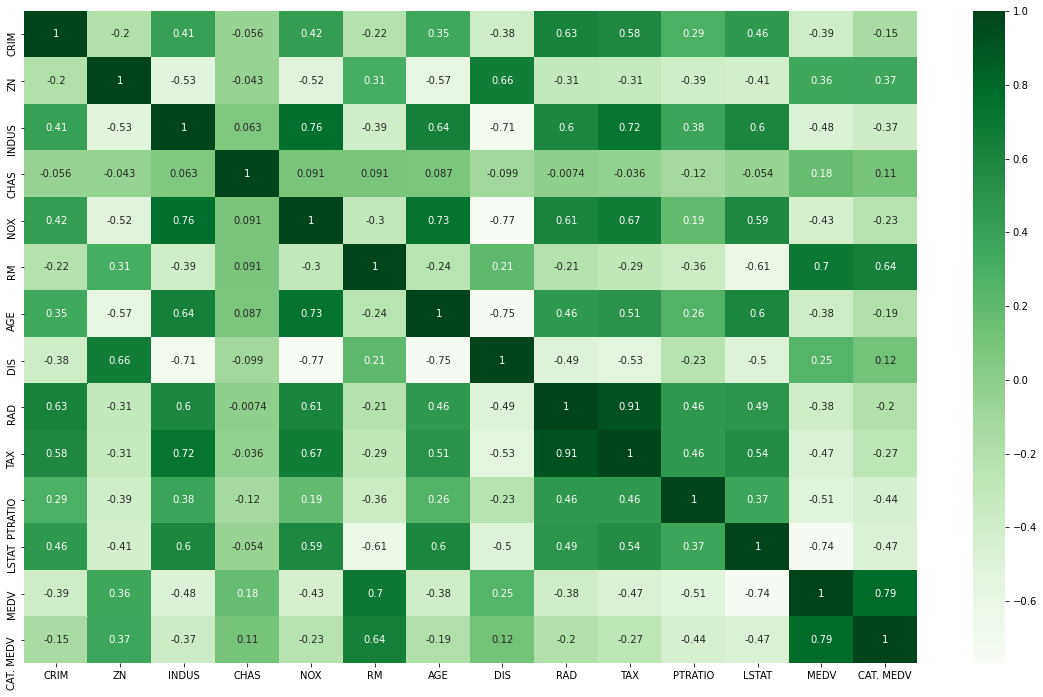

In [188]:
columns = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','LSTAT','MEDV','CAT. MEDV']
df_BostonHdata = df_BostonH[columns]
BostonHcorr = df_BostonHdata.corr()
plt.figure(figsize=(20, 12))
sns.heatmap(BostonHcorr,annot=True,cmap='Greens')

1. Choose which variables to include in your model and be sure to provide some explanation regarding that choice. In other words, tell me why you are choosing certain variables to be included in your model.
>**Answer:**<br>Using CAT.MEDV as dependant variable, we can choose the variables that have high correlation with CAT.MEDV (excluding MEDV as they are derviative). Variables chosen are 'ZN','INDUS','AGE','RM','PTRATIO' and 'LSTAT'

In [189]:
predictors = ['ZN','INDUS','AGE','RM','PTRATIO','LSTAT']

X = df_BostonH[predictors]
y = df_BostonH['CAT. MEDV']

# Split data
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.25,random_state=10)

model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [190]:
# make class predictions for the testing set
y_pred_class = model.predict(X_test)
print(y_pred_class)
print(y_test.values)

[0 1 0 0 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0
 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0]
[0 1 0 0 0 0 1 0 0 1 0 0 1 1 1 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0
 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 1
 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0]


In [191]:
y_pred_prob = model.predict_proba(X_test)[:,1]
y_pred_prob

array([1.64380987e-01, 5.03053566e-01, 2.80047705e-01, 3.60617021e-01,
       2.61612952e-03, 2.75424401e-03, 9.53868007e-01, 1.13107498e-04,
       4.12702265e-03, 9.85476622e-01, 3.94153686e-03, 2.25510817e-01,
       3.89734819e-02, 6.27891533e-01, 4.26242545e-01, 9.97635824e-01,
       4.37776853e-02, 4.43388204e-03, 1.99452959e-02, 8.78762254e-03,
       6.97118358e-01, 1.59243522e-03, 3.56396007e-02, 5.48717275e-02,
       8.78644710e-01, 4.91175074e-03, 6.89992100e-03, 1.74106528e-03,
       9.70840834e-01, 9.32676721e-08, 8.20051495e-01, 6.71222361e-01,
       2.39350765e-01, 1.62020474e-02, 1.62804648e-03, 1.69822697e-03,
       2.42048512e-06, 7.14157184e-01, 4.20331677e-02, 1.29115972e-01,
       7.94582009e-01, 2.50485933e-01, 9.12507325e-04, 4.80262838e-01,
       1.78827488e-03, 3.73269871e-01, 3.51126763e-03, 4.34738680e-03,
       9.83408015e-01, 1.41904370e-03, 1.17588813e-02, 1.12341457e-03,
       1.23733653e-02, 9.16084179e-01, 1.78666266e-01, 8.15426298e-01,
      

C:\Users\akash\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).



<AxesSubplot:ylabel='Density'>

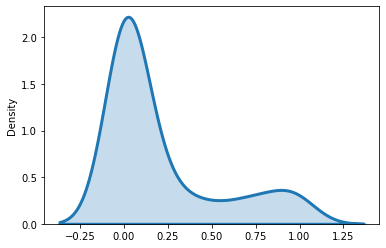

In [192]:
# Density Plot of predicted probabilities
sns.distplot(y_pred_prob, hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3},)

In [193]:
# predict median category as 1 if the predicted probability is higher than 0.2

y_pred_class = binarize([y_pred_prob], threshold=0.2)[0]
y_pred_class

array([0., 1., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 1., 0.,
       0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 1., 0.,
       0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0.,
       1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1.,
       1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 1., 0., 0., 0., 0., 0.])

In [194]:
# Create list of values for loop to iterate over
threshold = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]

# Create empty lists to store metric values created within loop
recall = []
FPR = []
FNR = []
F1 = []
Accuracy = []

# Start loop
for i in threshold:
    
    # Create class assignments given threshold value
    y_pred_class = binarize([y_pred_prob],threshold=i)[0]
    
    # Create Metrics
    confusion = metrics.confusion_matrix(y_test, y_pred_class)
    recall_value = metrics.recall_score(y_test, y_pred_class).round(3)
    fpr_value = (confusion[0,1] / (confusion[0,1] + confusion[0,0]) ).round(2)
    fnr_value = (confusion[1,0] / (confusion[1,0] + confusion[1,1]) ).round(2)
    f1_value = metrics.f1_score(y_test, y_pred_class).round(2)
    accuracy_value = metrics.accuracy_score(y_test, y_pred_class).round(2)
    
    
    # Append lists
    recall.append(recall_value)
    FPR.append(fpr_value)
    FNR.append(fnr_value)
    F1.append(f1_value)
    Accuracy.append(accuracy_value)

# Create dataframe
result = pd.DataFrame({"threshold":threshold,
                       "recall":recall,
                       "FPR":FPR,
                       "FNR":FNR,
                       "F1_Score": F1,
                       "Accuracy": Accuracy
                      })

# Show result
result

,threshold,recall,FPR,FNR,F1_Score,Accuracy
0,0.0,1.000,1.00,0.00,0.35,0.21
1,0.1,0.926,0.22,0.07,0.68,0.81
2,0.2,0.926,0.12,0.07,0.78,0.89
3,0.3,0.889,0.07,0.11,0.83,0.92
4,0.4,0.889,0.03,0.11,0.89,0.95
5,0.5,0.815,0.02,0.19,0.86,0.94
6,0.6,0.741,0.02,0.26,0.82,0.93
7,0.7,0.593,0.01,0.41,0.73,0.91
8,0.8,0.519,0.00,0.48,0.68,0.90
9,0.9,0.370,0.00,0.63,0.54,0.87


In [195]:
y_pred_class = binarize([y_pred_prob],threshold=0.4)[0]

# Create Metrics
confusion= metrics.confusion_matrix(y_test, y_pred_class)
recall_value = metrics.recall_score(y_test, y_pred_class).round(3)
fpr_value = (confusion[0,1] / (confusion[0,1] + confusion[0,0]) ).round(2)
fnr_value = (confusion[1,0] / (confusion[1,0] + confusion[1,1]) ).round(2)
f1_value= metrics.f1_score(y_test, y_pred_class).round(2)
accuracy_value = metrics.accuracy_score(y_test, y_pred_class).round(2)

report=pd.DataFrame({'Recall':[recall_value],
                     'FPR':[fpr_value],
                     'FNR':[fnr_value],
                     'F1':[f1_value],
                     'Accuracy':[accuracy_value]
                    })
report

,Recall,FPR,FNR,F1,Accuracy
0,0.889,0.03,0.11,0.89,0.95


2. Choose a classification threshold and explain your choice.

>**Answer:**<br> I use 0.4 as my classification threshold as that has the highest value for most of the metrics.

3. Explanations for a. and b. above should include discussion of some specific performance measures. What performance measures are you using and why?

>**Answer:**<br> F1-Score is a good performance measure since it is a result of Recall and Precision which will help us determine if our model can identify the positive cases and negative cases correctly. Thus we use F1-Scorr over others. Also, if we use Recall or FNR it will be difficult to determine if our model was able to identify the negative cases correctly. The same with FPR as we will be unsure if the positive cases identified are correct or not. If we would consider Accuracy we would want to have more cases in negative.

In [196]:
# kNN
# Train a classifier for different values of k
results = []
for k in range(1,31):
    knn = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
    y_pred_class = knn.predict(X_test)
    confusion = metrics.confusion_matrix(y_test,y_pred_class)
    results.append({'k':k,
                    'accuracy':metrics.accuracy_score(y_test,knn.predict(X_test)),
                    'fnr':(confusion[1,0] / (confusion[1,0] + confusion[1,1])).round(3),
                    'f1_value':metrics.f1_score(y_test, y_pred_class).round(3),
                    'recall_value': metrics.recall_score(y_test, y_pred_class).round(3),
                    'precision_score': metrics.precision_score(y_test, y_pred_class).round(3)
                   })

# Convert results to Pandas dataframe
results = pd.DataFrame(results)

In [197]:
# Create Plot to observe different performance at different k
fig = go.Figure()

# Add traces
fig.add_trace(go.Scatter(x=list(range(1,30)), 
                         y=results['f1_value'],
                         mode='lines',
                         name='F1-Score',
                         marker=dict(size=8,
                                     color='green',
                                     line=dict(width=1,
                                               color='blue'))))
fig.add_trace(go.Scatter(x=list(range(1,30)), 
                         y=results['accuracy'],
                         mode='lines',
                         name='accuracy',
                         marker=dict(size=8,
                                     color='teal',
                                     line=dict(width=1,
                                               color='blue'))))

fig.add_trace(go.Scatter(x=list(range(1,30)), 
                         y=results['recall_value'],
                         mode='lines',
                         name='recall',
                         marker=dict(size=8,
                                     color='purple',
                                     line=dict(width=1,
                                               color='blue'))))

fig.add_trace(go.Scatter(x=list(range(1,30)), 
                         y=results['precision_score'],
                         mode='lines',
                         name='Precision',
                         marker=dict(size=8,
                                     color='orange',
                                     line=dict(width=1,
                                               color='blue'))))

# Edit the layout
fig.update_layout(
                   xaxis_title='K',
                   yaxis_title='Value')


fig.show()

1. Choose k, the number of neighbors to use in your classification. Why did you select that value?

>**Anser:**<br>The plot helps us understand that when k is 7 the 4 metrics namely Accuracy, F1-score, Precision and are almost highest except Recall. 

2. You may choose to adjust your classification rule. Remember, by default, the rule is “majority rule.” If we want a probability threshold that is different than 50%, you will have to use the “predict_proba()” function to compute class prediction probabilities and then feed those probabilities into the “binarize()” function to get class assignments based on a different probability threshold.

In [198]:
# k=7
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)

# Store predicted probability for Completed task_Yes = 1
y_pred_prob = knn.predict_proba(X_test)[:,1]

# make class predictions for the testing set
y_pred_class = knn.predict(X_test)

In [199]:
# Create list of values for loop to iterate over
threshold = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]

# Create empty lists to store metric values created within loop
recall = []
FPR = []
FNR = []
F1 = []
Accuracy = []


# Start loop
for i in threshold:
    
    # Create class assignments given threshold value
    y_pred_class = binarize([y_pred_prob],threshold=i)[0]
    
    # Create Metrics
    confusion = metrics.confusion_matrix(y_test, y_pred_class)
    recall_value = metrics.recall_score(y_test, y_pred_class).round(3)
    fpr_value = (confusion[0,1] / (confusion[0,1] + confusion[0,0]) ).round(3)
    fnr_value = (confusion[1,0] / (confusion[1,0] + confusion[1,1]) ).round(3)
    f1_value = metrics.f1_score(y_test, y_pred_class).round(3)
    accuracy_value = metrics.accuracy_score(y_test, y_pred_class).round(3)
    
    
    
    # Append lists
    recall.append(recall_value)
    FPR.append(fpr_value)
    FNR.append(fnr_value)
    F1.append(f1_value)
    Accuracy.append(accuracy_value)
  

    # Create dataframe
result = pd.DataFrame({"threshold":threshold,
                       "recall":recall,
                       "FPR":FPR,
                       "FNR":FNR,
                       "F1_Score": F1,
                       "Accuracy": Accuracy
                      })

# Show result
result

,threshold,recall,FPR,FNR,F1_Score,Accuracy
0,0.0,0.926,0.19,0.074,0.704,0.835
1,0.1,0.926,0.19,0.074,0.704,0.835
2,0.2,0.852,0.06,0.148,0.821,0.921
3,0.3,0.741,0.03,0.259,0.800,0.921
4,0.4,0.741,0.03,0.259,0.800,0.921
5,0.5,0.667,0.00,0.333,0.800,0.929
6,0.6,0.519,0.00,0.481,0.683,0.898
7,0.7,0.519,0.00,0.481,0.683,0.898
8,0.8,0.407,0.00,0.593,0.579,0.874
9,0.9,0.259,0.00,0.741,0.412,0.843


3. In making your decisions regarding “k” and “majority rule”, be sure to discuss your goals (performance measures of interest).
>**Answer**<br> In continuation to what we observed above, I will choose the threshold value of 0.5 since at that threshold we see the highest accuracy.

In [200]:
knn = KNeighborsClassifier(n_neighbors=7)
y_pred_class = binarize([y_pred_prob],threshold=0.5)[0]
# Create Metrics
confusion = metrics.confusion_matrix(y_test, y_pred_class)
recall_value = metrics.recall_score(y_test, y_pred_class).round(3)
fpr_value = (confusion_knn[0,1] / (confusion_knn[0,1] + confusion_knn[0,0]) ).round(2)
fnr_value = (confusion_knn[1,0] / (confusion_knn[1,0] + confusion_knn[1,1]) ).round(2)
f1_value = metrics.f1_score(y_test, y_pred_class).round(2)
accuracy_value = metrics.accuracy_score(y_test, y_pred_class).round(2)
report=pd.DataFrame({'Recall':[recall_value],
                     'FPR':[fpr_value],
                     'FNR':[fnr_value],
                     'F1':[f1_value],
                     'Accuracy':[accuracy_value]
                    })
report

,Recall,FPR,FNR,F1,Accuracy
0,0.667,0.0,0.33,0.8,0.93


Compare and contrast your LR and kNN results. If you had to choose between these methods, which method would you choose for each dataset?

>**Answer:**<br> From what we observed,knn and the logistic regression perfom the similar. Having said that, if we take sensitivity to account KNN has a higher accuracy in terms of F1 in relativity.
I would prefer the KNN model.

# Heart Disease


In [201]:
df_HeartDisease = pd.read_excel('HeartDisease.xls')
df_HeartDisease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,1


In [202]:
df_HeartDisease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  target    303 non-null    int64  
dtypes: float64(1), int64(12)
memory usage: 30.9 KB


In [203]:
df_HeartDisease.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,1.000000


>**Note:** - When we compare the means with the standard deviations of cp, restecg, exang, oldpeak, ca and target. We can determine that there is high variation between them as std is very close to the mean whereas the range is not that high for these variables as well.

<AxesSubplot:>

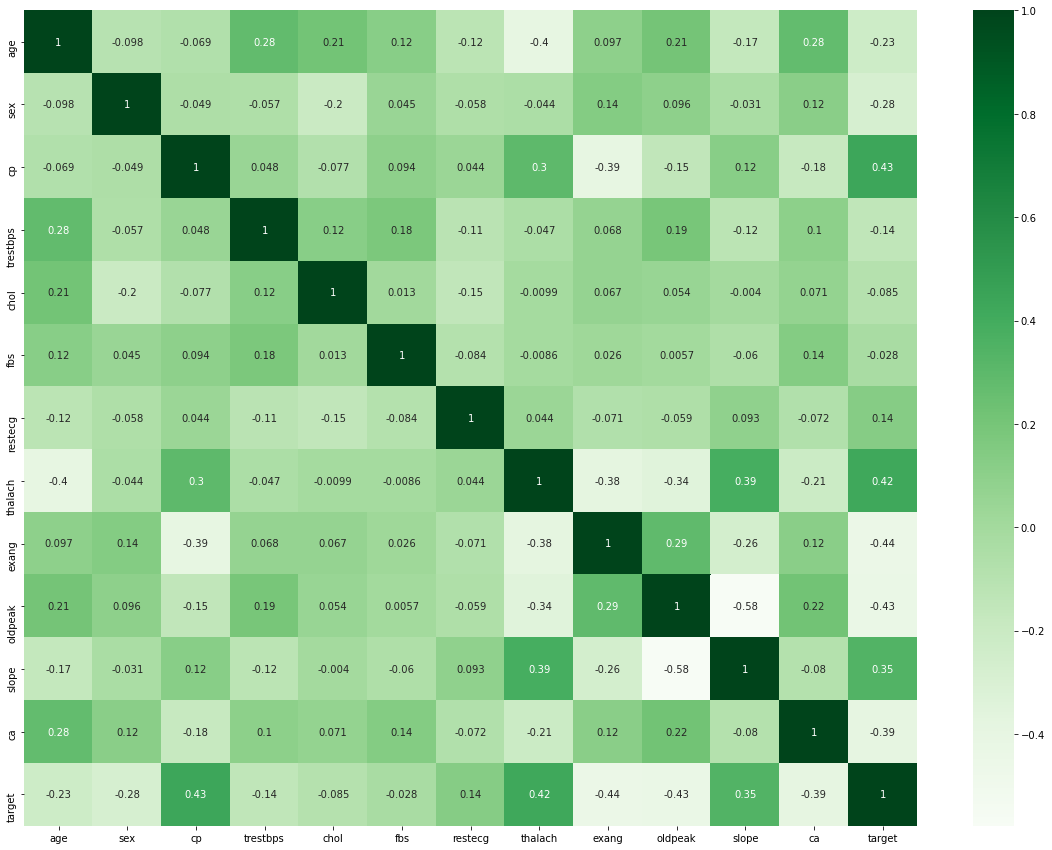

In [204]:
# Heatmap.
plt.figure(figsize=(20, 15))
sns.heatmap(df_HeartDisease.corr(),annot=True,cmap='Greens')

1. Choose which variables to include in your model and be sure to provide some explanation regarding that choice. In other words, tell me why you are choosing certain variables to be included in your model.

>**Answer**:<br> Choosing the variables that have high correlation with respect to the dependant variable Target.




In [205]:
# Split Data
predictors = ['sex','cp', 'thalach', 'exang', 'oldpeak', 'slope', 'ca']
X = df_HeartDisease[predictors] 
y = df_HeartDisease['target'] 

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=10)

# Normalize Data
X_train_means = X_train.mean()
X_train_std = X_train.std()

X_train = (X_train - X_train_means)/X_train_std
X_test = (X_test - X_train_means)/X_train_std

# Run LogisticRegression 
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)

LogisticRegression()

In [206]:
# Store predicted probability for Completed task_Yes = 1
y_pred_prob = log_reg.predict_proba(X_test)[:,1]

# make class predictions for the testing set
y_pred_class = log_reg.predict(X_test)

In [207]:
# Create list of values for loop to iterate over
threshold = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]

# Create empty lists to store metric values created within loop
recall = []
FPR = []
FNR = []
F1 = []
Accuracy = []

# Start loop
for i in threshold:
    
    # Create class assignments given threshold value
    y_pred_class = binarize([y_pred_prob],threshold=i)[0]
    
    # Create Metrics
    confusion = metrics.confusion_matrix(y_test, y_pred_class)
    recall_value = metrics.recall_score(y_test, y_pred_class).round(3)
    fpr_value = (confusion[0,1] / (confusion[0,1] + confusion[0,0]) ).round(2)
    fnr_value = (confusion[1,0] / (confusion[1,0] + confusion[1,1]) ).round(2)
    f1_value = metrics.f1_score(y_test, y_pred_class).round(2)
    accuracy_value = metrics.accuracy_score(y_test, y_pred_class).round(2)
    
    
    # Append lists
    recall.append(recall_value)
    FPR.append(fpr_value)
    FNR.append(fnr_value)
    F1.append(f1_value)
    Accuracy.append(accuracy_value)

# Create dataframe
result = pd.DataFrame({"threshold":threshold,
                       "recall":recall,
                       "FPR":FPR,
                       "FNR":FNR,
                       "F1_Score": F1,
                       "Accuracy": Accuracy
                      })

# Show result
result

,threshold,recall,FPR,FNR,F1_Score,Accuracy
0,0.0,1.000,1.00,0.00,0.62,0.45
1,0.1,0.976,0.66,0.02,0.70,0.63
2,0.2,0.927,0.48,0.07,0.74,0.70
3,0.3,0.927,0.44,0.07,0.75,0.73
4,0.4,0.927,0.38,0.07,0.78,0.76
5,0.5,0.854,0.36,0.15,0.74,0.74
6,0.6,0.829,0.24,0.17,0.78,0.79
7,0.7,0.756,0.16,0.24,0.77,0.80
8,0.8,0.610,0.10,0.39,0.70,0.77
9,0.9,0.341,0.02,0.66,0.50,0.69


2. Choose a classification threshold and explain your choice.
>**Answer:**<br> Classification Threshold of 0.4 has the highest F1 Score hence we can use that.

3. Explanations for a. and b. above should include discussion of some specific performance measures. What performance measures are you using and why?
>**Answer:**<br> F1-Score or Accuracy is a good performance measure. As we know that F1-Scorr is a result of Recall and Precision which will help us determine if our model can identify the positive cases and negative cases correctly. Thus we use F1-Score over others. Also, if we use Recall or FNR it will be difficult to determine if our model was able to identify the negative cases correctly. The same with FPR as we will be unsure if the positive cases identified are correct or not. If we would consider Accuracy we would want to have more cases in negative.

In [208]:
y_pred_class = binarize([y_pred_prob],threshold=0.4)[0]

# Create Metrics
confusion= metrics.confusion_matrix(y_test, y_pred_class)
recall_value = metrics.recall_score(y_test, y_pred_class).round(3)
fpr_value = (confusion[0,1] / (confusion[0,1] + confusion[0,0]) ).round(2)
fnr_value = (confusion[1,0] / (confusion[1,0] + confusion[1,1]) ).round(2)
f1_value= metrics.f1_score(y_test, y_pred_class).round(2)
accuracy_value = metrics.accuracy_score(y_test, y_pred_class).round(2)

report=pd.DataFrame({'Recall':[recall_value],
                     'FPR':[fpr_value],
                     'FNR':[fnr_value],
                     'F1':[f1_value],
                     'Accuracy':[accuracy_value]
                    })
report

,Recall,FPR,FNR,F1,Accuracy
0,0.927,0.38,0.07,0.78,0.76


# Create a kNN Classification model:

In [209]:
# kNN
# Train a classifier for different values of k
results = []
for k in range(1,50):
    knn = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
    y_pred_class = knn.predict(X_test)
    confusion = metrics.confusion_matrix(y_test,y_pred_class)
    results.append({'k':k,
                    'accuracy':metrics.accuracy_score(y_test,knn.predict(X_test)),
                    'fnr':(confusion[1,0] / (confusion[1,0] + confusion[1,1])).round(3),
                    'f1_value':metrics.f1_score(y_test, y_pred_class).round(3),
                    'recall_value': metrics.recall_score(y_test, y_pred_class).round(3),
                    'precision_score': metrics.precision_score(y_test, y_pred_class).round(3)
                   })

# Convert results to Pandas dataframe
results = pd.DataFrame(results)

# Create Plot to observe different performance at different k
fig = go.Figure()

# Add traces
fig.add_trace(go.Scatter(x=list(range(1,50)), 
                         y=results['f1_value'],
                         mode='lines',
                         name='F1-Score',
                         marker=dict(size=8,
                                     color='green',
                                     line=dict(width=1,
                                               color='blue'))))
fig.add_trace(go.Scatter(x=list(range(1,50)), 
                         y=results['accuracy'],
                         mode='lines',
                         name='accuracy',
                         marker=dict(size=8,
                                     color='teal',
                                     line=dict(width=1,
                                               color='blue'))))

fig.add_trace(go.Scatter(x=list(range(1,50)), 
                         y=results['recall_value'],
                         mode='lines',
                         name='recall',
                         marker=dict(size=8,
                                     color='purple',
                                     line=dict(width=1,
                                               color='blue'))))

fig.add_trace(go.Scatter(x=list(range(1,50)), 
                         y=results['precision_score'],
                         mode='lines',
                         name='Precision',
                         marker=dict(size=8,
                                     color='orange',
                                     line=dict(width=1,
                                               color='blue'))))

# Edit the layout
fig.update_layout(
                   xaxis_title='K',
                   yaxis_title='Value')


fig.show()

2. Choose k, the number of neighbors to use in your classification. Why did you select that value?
>**Answer:**<br> We can use k as 11 since at 11 it is highest in all the metrics
3. You may choose to adjust your classification rule. Remember, by default, the rule is “majority rule.” If we want a probability threshold that is different than 50%, you will have to use the “predict_proba()” function to compute class prediction probabilities and then feed those probabilities into the “binarize()” function to get class assignments based on a different probability threshold.

In [210]:
# k=11
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train,y_train)
# Store predicted probability for Completed task_Yes = 1
y_pred_prob = knn.predict_proba(X_test)[:,1]

# make class predictions for the testing set
y_pred_class = knn.predict(X_test)

In [211]:
# Create list of values for loop to iterate over
threshold = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]

# Create empty lists to store metric values created within loop
recall = []
FPR = []
FNR = []
F1 = []
Accuracy = []


# Start loop
for i in threshold:
    
    # Create class assignments given threshold value
    y_pred_class = binarize([y_pred_prob],threshold=i)[0]
    
    # Create Metrics
    confusion = metrics.confusion_matrix(y_test, y_pred_class)
    recall_value = metrics.recall_score(y_test, y_pred_class).round(3)
    fpr_value = (confusion[0,1] / (confusion[0,1] + confusion[0,0]) ).round(3)
    fnr_value = (confusion[1,0] / (confusion[1,0] + confusion[1,1]) ).round(3)
    f1_value = metrics.f1_score(y_test, y_pred_class).round(3)
    accuracy_value = metrics.accuracy_score(y_test, y_pred_class).round(3)
    
    
    
    # Append lists
    recall.append(recall_value)
    FPR.append(fpr_value)
    FNR.append(fnr_value)
    F1.append(f1_value)
    Accuracy.append(accuracy_value)
  

    # Create dataframe
result = pd.DataFrame({"threshold":threshold,
                       "recall":recall,
                       "FPR":FPR,
                       "FNR":FNR,
                       "F1_Score": F1,
                       "Accuracy": Accuracy
                      })

# Show result
resul

NameError: name 'resul' is not defined

In [212]:
knn = KNeighborsClassifier(n_neighbors=11)
y_pred_class = binarize([y_pred_prob],threshold=0.5)[0]
# Create Metrics
confusion = metrics.confusion_matrix(y_test, y_pred_class)
recall_value = metrics.recall_score(y_test, y_pred_class).round(3)
fpr_value = (confusion_knn[0,1] / (confusion_knn[0,1] + confusion_knn[0,0]) ).round(2)
fnr_value = (confusion_knn[1,0] / (confusion_knn[1,0] + confusion_knn[1,1]) ).round(2)
f1_value = metrics.f1_score(y_test, y_pred_class).round(2)
accuracy_value = metrics.accuracy_score(y_test, y_pred_class).round(2)
report=pd.DataFrame({'Recall':[recall_value],
                     'FPR':[fpr_value],
                     'FNR':[fnr_value],
                     'F1':[f1_value],
                     'Accuracy':[accuracy_value]
                    })
report

,Recall,FPR,FNR,F1,Accuracy
0,0.927,0.0,0.33,0.81,0.8


3. In making your decisions regarding “k” and “majority rule”, be sure to discuss your goals (performance measures of interest).
<br>Both F1 and Accuracy are high when we choose k = 11 and threshold value as 0.5

Compare and contrast your LR and kNN results. If you had to choose between these methods, which method would you choose for each dataset?

>**Answer:**<br>Both Knn and Logistic Regression have the same recall value however, the accuracy and F1 for Knn is better therefore we can chose Knn Classifier.